# Tutorial: General Usage
In this notebook, we use `aughs` to fit a decision tree and a random forest with augmented hierarchical shrinkage to a dataset, and plot the resulting feature importances.

In [11]:
import sys
sys.path.append('../')  # Necessary to import aughs from parent directory

from aughs import ShrinkageClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imodels.util.data_util import get_clean_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from matplotlib import pyplot as plt

## 1. Fitting the models

In [12]:
# Load and split the data
X, y, feature_names = get_clean_dataset("breast_cancer", data_source="imodels")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train a decision tree with entropy-based augmented HS
clf_tree = ShrinkageClassifier(DecisionTreeClassifier(), # Use a decision tree as the base classifier
                          shrink_mode="hs_entropy", # Use entropy-based HS
                          lmb=10) # Use a lambda of 10
clf_tree.fit(X_train, y_train)
print("Accuracy:", clf_tree.score(X_test, y_test))
print("Balanced accuracy:", balanced_accuracy_score(y_test, clf_tree.predict(X_test)))

Accuracy: 0.8214285714285714
Balanced accuracy: 0.7857142857142857


In [21]:
# Train a random forest with log-cardinality-based augmented HS
clf_forest = ShrinkageClassifier(RandomForestClassifier(), # Use a random forest as the base classifier
                          shrink_mode="hs_log_cardinality", # Use log-cardinality-based HS
                          lmb=10) # Use a lambda of 10
clf_forest.fit(X_train, y_train)
print("Accuracy:", clf_forest.score(X_test, y_test))
print("Balanced accuracy:", balanced_accuracy_score(y_test, clf_forest.predict(X_test)))

Accuracy: 0.8035714285714286
Balanced accuracy: 0.6547619047619048


## 2. Plotting feature importances
Feature importances can be accessed using the `feature_importances_` attribute of the `estimator_` object in the classifier. This `estimator_` object is a scikit-learn decision tree or random forest, depending on which type was passed in the constructor of the `ShrinkageClassifier`, so we can just treat it like any other scikit-learn classifier.

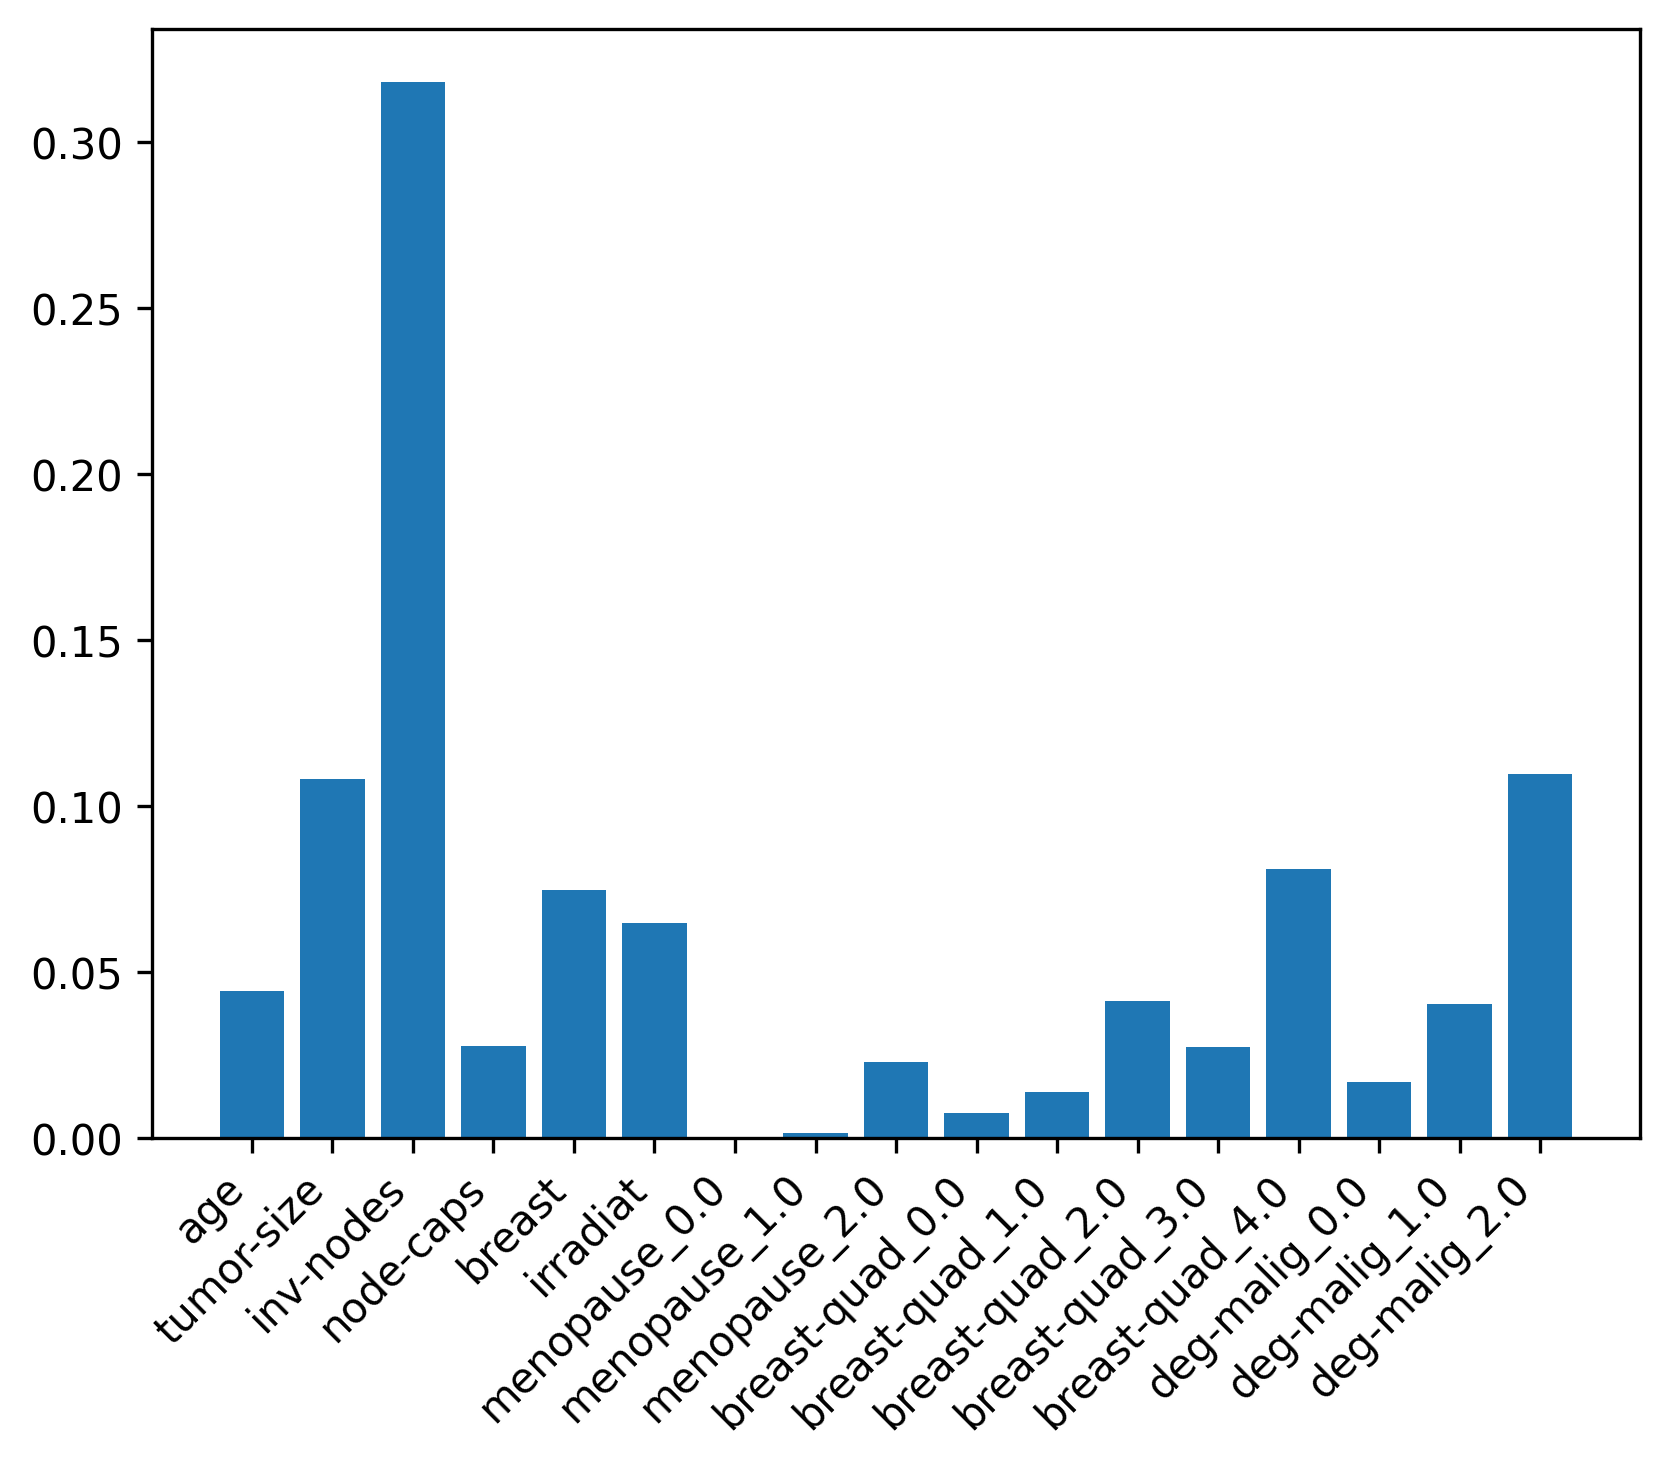

In [17]:
tree_importances = clf_tree.estimator_.feature_importances_
plt.bar(range(len(tree_importances)), tree_importances)
plt.xticks(range(len(tree_importances)), feature_names, rotation=45, ha="right")
plt.title("Decision tree feature importances")
plt.show()

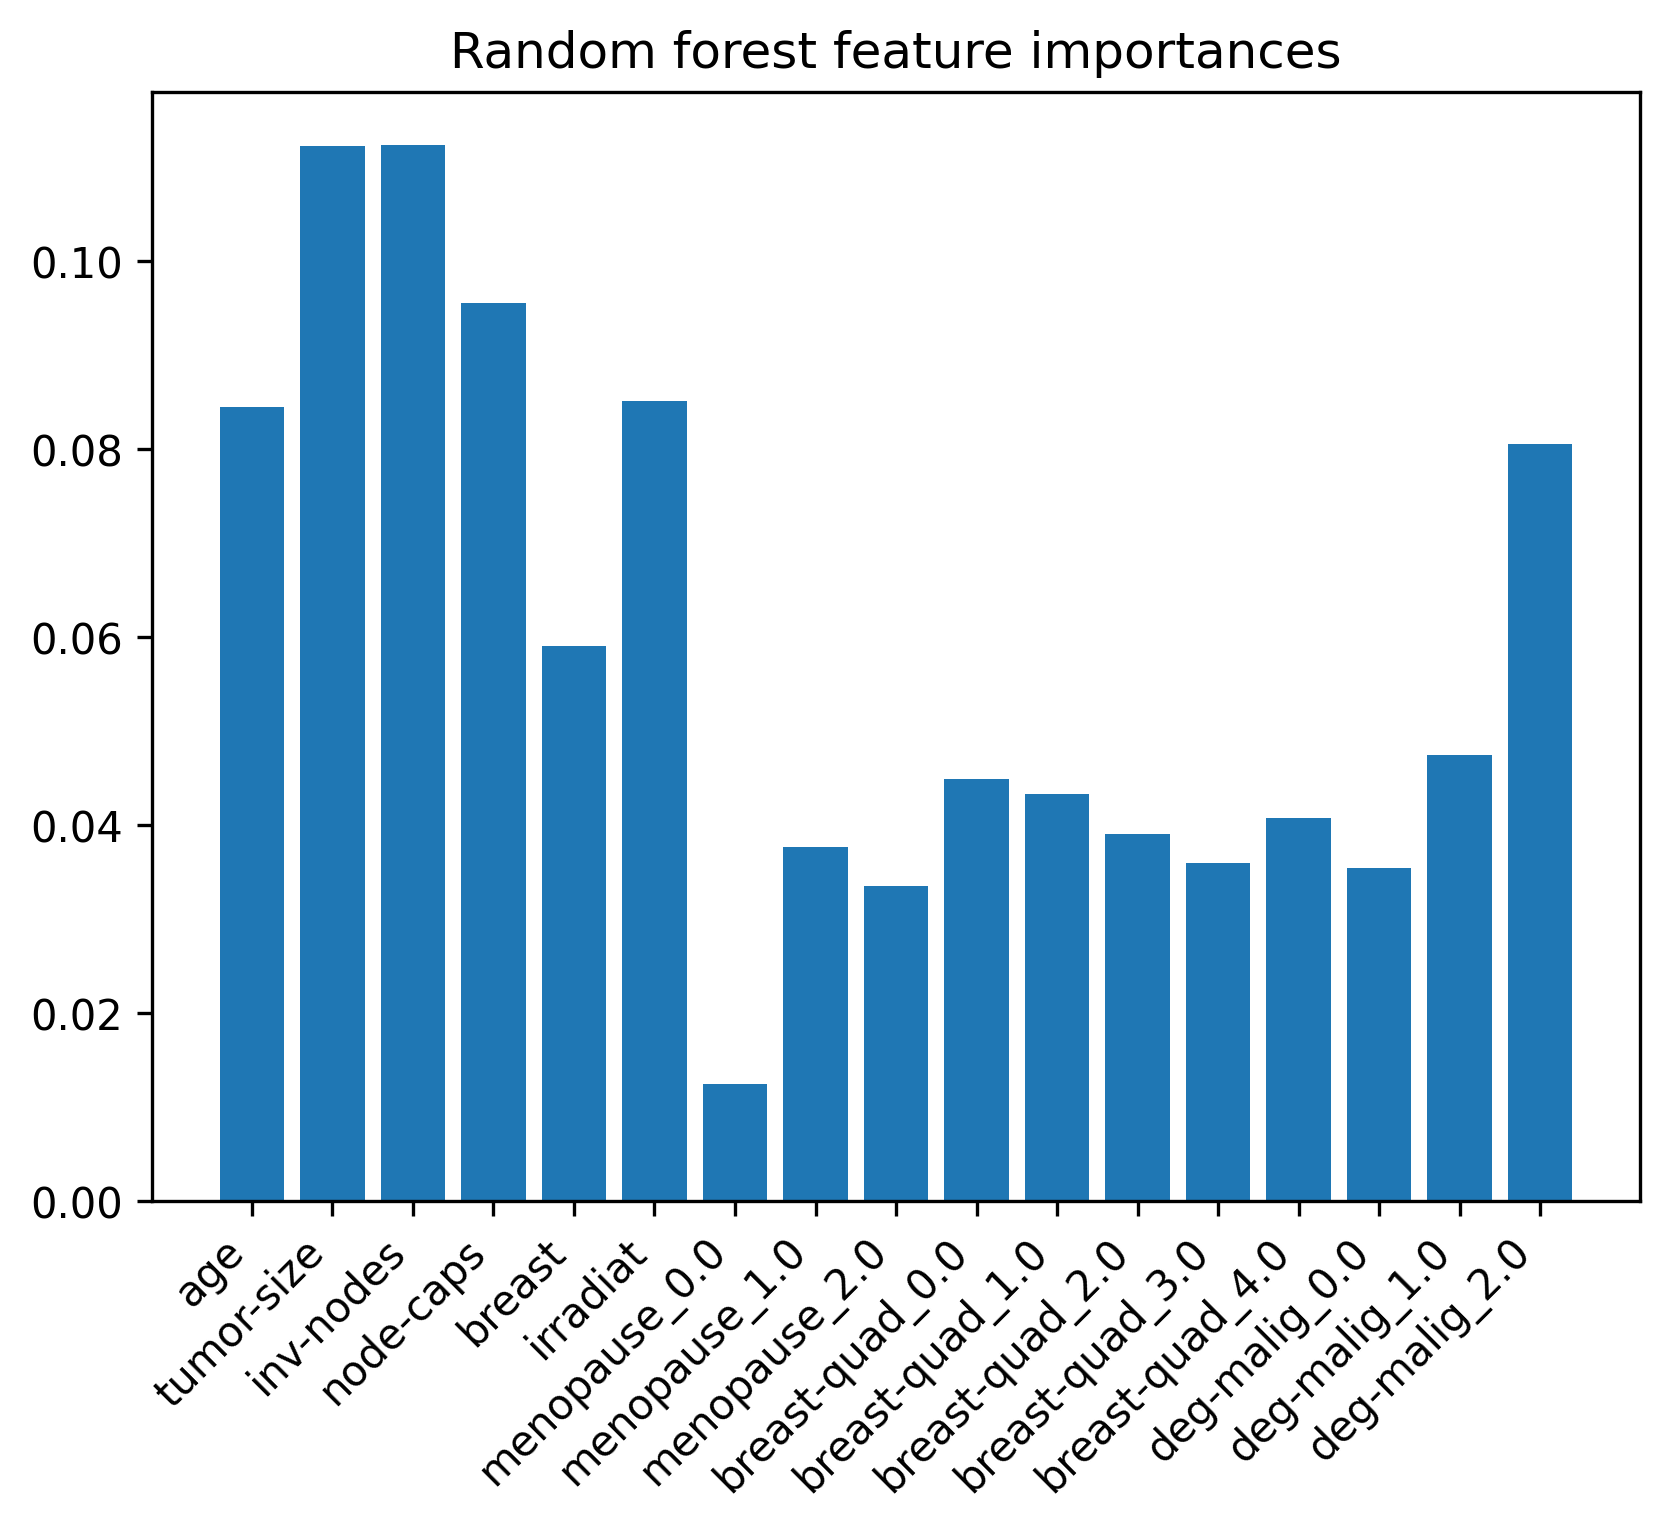

In [22]:
forest_importances = clf_forest.estimator_.feature_importances_
plt.bar(range(len(forest_importances)), forest_importances)
plt.xticks(range(len(forest_importances)), feature_names, rotation=45, ha="right")
plt.title("Random forest feature importances")
plt.show()